In [1]:
from collections import deque

tree = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'G'],
    'E': ['B', 'G'],
    'F': ['C'],
    'G': ['D', 'E', 'H'],
    'H': ['G']
}

start = 'A'
goal = 'H'

In [2]:
def bfs_shortest_path(tree, start, goal):
    queue = deque([start])
    visited = set([start])
    parent = {start: None}
    nodes_explored = 0

    while queue:
        node = queue.popleft()
        nodes_explored += 1

        if node == goal:
            break

        for neighbor in tree[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = node
                queue.append(neighbor)

    if goal not in parent:
        return None, nodes_explored

    path = []
    curr = goal
    while curr is not None:
        path.append(curr)
        curr = parent[curr]
    path.reverse()

    return path, nodes_explored


In [3]:
def dfs_find_path(tree, start, goal):
    stack = [start]
    visited = set([start])
    parent = {start: None}
    nodes_explored = 0

    while stack:
        node = stack.pop()
        nodes_explored += 1

        if node == goal:
            break

        for neighbor in tree[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = node
                stack.append(neighbor)

    if goal not in parent:
        return None, nodes_explored

    path = []
    curr = goal
    while curr is not None:
        path.append(curr)
        curr = parent[curr]
    path.reverse()

    return path, nodes_explored


In [4]:
def bidirectional_bfs(tree, start, goal):
    if start == goal:
        return [start], 1

    q_start = deque([start])
    q_goal = deque([goal])

    visited_start = {start}
    visited_goal = {goal}

    parent_start = {start: None}
    parent_goal = {goal: None}

    nodes_explored = 0

    while q_start and q_goal:
        # Expand from start side
        for _ in range(len(q_start)):
            node = q_start.popleft()
            nodes_explored += 1

            for neighbor in tree[node]:
                if neighbor not in visited_start:
                    visited_start.add(neighbor)
                    parent_start[neighbor] = node
                    q_start.append(neighbor)

                    if neighbor in visited_goal:
                        return build_path(neighbor, parent_start, parent_goal), nodes_explored

        # Expand from goal side
        for _ in range(len(q_goal)):
            node = q_goal.popleft()
            nodes_explored += 1

            for neighbor in tree[node]:
                if neighbor not in visited_goal:
                    visited_goal.add(neighbor)
                    parent_goal[neighbor] = node
                    q_goal.append(neighbor)

                    if neighbor in visited_start:
                        return build_path(neighbor, parent_start, parent_goal), nodes_explored

    return None, nodes_explored


In [5]:
def build_path(meeting, parent_start, parent_goal):
    path_start = []
    curr = meeting
    while curr is not None:
        path_start.append(curr)
        curr = parent_start[curr]
    path_start.reverse()

    path_goal = []
    curr = parent_goal[meeting]
    while curr is not None:
        path_goal.append(curr)
        curr = parent_goal[curr]

    return path_start + path_goal


In [6]:
bfs_path, bfs_nodes = bfs_shortest_path(tree, start, goal)
dfs_path, dfs_nodes = dfs_find_path(tree, start, goal)
bidir_path, bidir_nodes = bidirectional_bfs(tree, start, goal)

print("BFS Path:", bfs_path)
print("BFS Moves:", len(bfs_path) - 1)
print("BFS Nodes Explored:", bfs_nodes)

print("\nDFS Path:", dfs_path)
print("DFS Moves:", len(dfs_path) - 1)
print("DFS Nodes Explored:", dfs_nodes)

print("\nBi-Directional BFS Path:", bidir_path)
print("Bi-Directional BFS Moves:", len(bidir_path) - 1)
print("Bi-Directional BFS Nodes Explored:", bidir_nodes)


BFS Path: ['A', 'B', 'D', 'G', 'H']
BFS Moves: 4
BFS Nodes Explored: 8

DFS Path: ['A', 'B', 'E', 'G', 'H']
DFS Moves: 4
DFS Nodes Explored: 7

Bi-Directional BFS Path: ['A', 'B', 'D', 'G', 'H']
Bi-Directional BFS Moves: 4
Bi-Directional BFS Nodes Explored: 5


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fixed positions to match the tree diagram
pos = {
    'A': (0, 4),
    'B': (-2, 3),
    'C': (2, 3),
    'D': (-3, 2),
    'E': (-1, 2),
    'F': (2, 2),
    'G': (-2, 1),
    'H': (-2, 0)
}


In [8]:
edges = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F'),
    ('D', 'G'),
    ('E', 'G'),
    ('G', 'H')
]


In [10]:
def draw_tree(edges, pos, path=None, title="Tree Visualization"):
    plt.figure(figsize=(8, 6))
    sns.set_style("white")

    # Draw edges
    for u, v in edges:
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        plt.plot(x, y, color="gray", linewidth=2)

    # Highlight path if provided
    if path:
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            x = [pos[u][0], pos[v][0]]
            y = [pos[u][1], pos[v][1]]
            plt.plot(x, y, color="red", linewidth=4)

    # Draw nodes
    for node, (x, y) in pos.items():
        plt.scatter(x, y, s=800, color="skyblue", edgecolors="black", zorder=3)
        plt.text(x, y, node, fontsize=14, ha='center', va='center', weight='bold')

    plt.title(title, fontsize=14)
    plt.axis("off")
    plt.show()

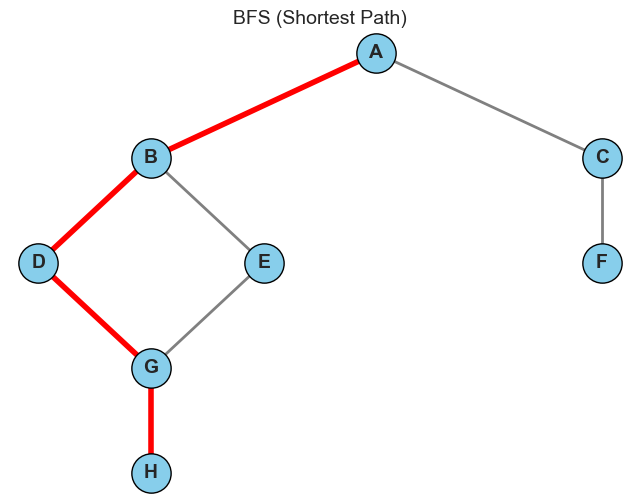

In [11]:
draw_tree(
    edges,
    pos,
    bfs_path,
    title="BFS (Shortest Path)"
)


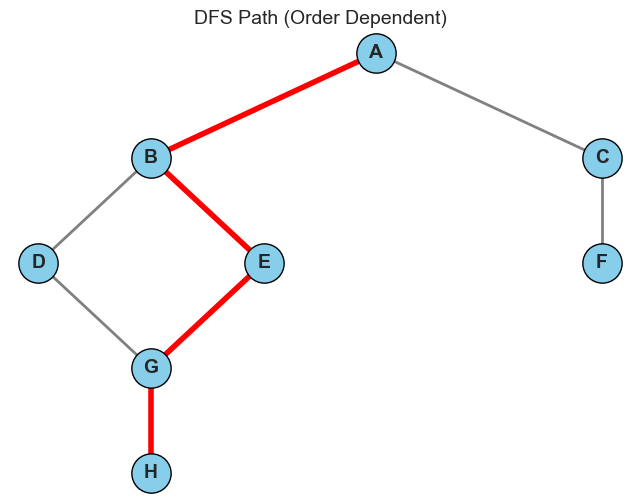

In [12]:
draw_tree(
    edges,
    pos,
    dfs_path,
    title="DFS Path (Order Dependent)"
)


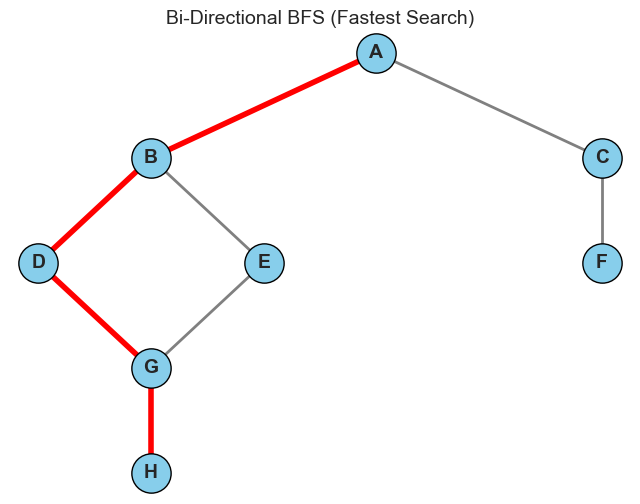

In [13]:
draw_tree(
    edges,
    pos,
    bidir_path,
    title="Bi-Directional BFS (Fastest Search)"
)
